# Test merge

Test using xgbxml to see how to merge the two files together.

The GitHub page for xgbxml is: https://github.com/stevenkfirth/xgbxml

## UNDER DEVELOPMENT

## Setup

In [1]:
# import packages
from xgbxml import get_parser
from lxml import etree
import matplotlib.pyplot as plt
from copy import copy

In [2]:
# uses xgbxml to generate a lxml parser to read gbXML version 0.37
parser=get_parser(version='0.37')

## Open file 'gbXML A_Geometry.xml'

In [3]:
# opens the file using the lxml parser
fp='gbXML A_Geometry.xml'
tree_A=etree.parse(fp,parser)
gbxml_A=tree_A.getroot()

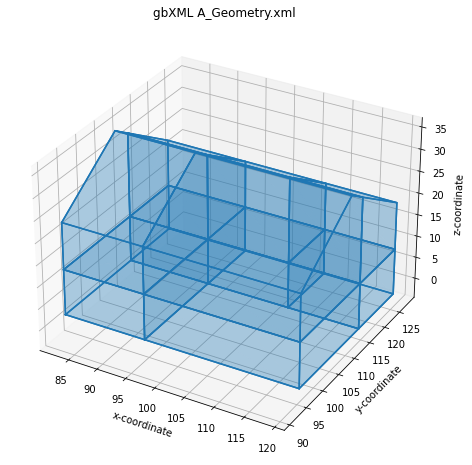

In [4]:
# renders the gbXML etree
ax=gbxml_A.Campus.render()
ax.figure.set_size_inches(8, 8)
ax.set_title('gbXML A_Geometry.xml')
plt.show()

## Open file 'gbXML B_Opening.xml'

In [5]:
# opens the file using the lxml parser
fp='gbXML B_Opening.xml'
tree_B=etree.parse(fp,parser)
gbxml_B=tree_B.getroot()

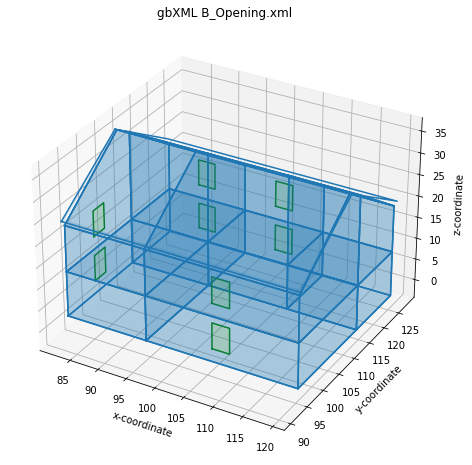

In [6]:
# renders the gbXML etree
ax=gbxml_B.Campus.render()
ax.figure.set_size_inches(8, 8)
ax.set_title('gbXML B_Opening.xml')
plt.show()

## Merge files to create 'gbXML C_Geometry-Opening.xml'

In [7]:
# creates a copy of gbxml_A which is named gbxml_C 
gbxml_C=copy(gbxml_A)
etree_C=etree.ElementTree(gbxml_C) 

In [8]:
openings=list(gbxml_B.Campus.Surfaces.Openings)
for su in gbxml_C.Campus.Surfaces:
    for opening in openings:
        try:
            su.copy_opening(opening,
                            tolerance=0.01)
            openings.remove(opening)
            break
        except ValueError:
            pass

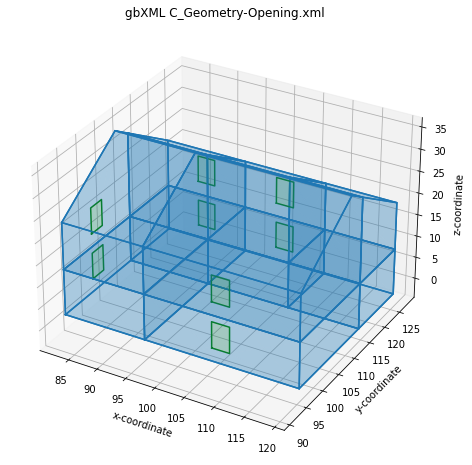

In [9]:
# renders the gbXML etree
ax=gbxml_C.Campus.render()
ax.figure.set_size_inches(8, 8)
ax.set_title('gbXML C_Geometry-Opening.xml')
plt.show() 

In [10]:
# writes the gbXML_C etree to a local file
etree_C.write('gbXML C_Geometry-Opening.xml', pretty_print=True)